# PART - 2

In [1]:
#Import libraries to call respective functions later
import pandas as pd 
import csv
import numpy as np

In [13]:
import seaborn as sns             # install using -- conda install seaborn
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
mexData = pd.read_csv('file:///home/yataolu/Downloads/programming/mexican.csv')
chiData = pd.read_csv('file:///home/yataolu/Downloads/programming/mexican.csv')

In [15]:
mexRatings = mexData[' Rating']
chiRatings = chiData[' Rating']

In [16]:
mexRatings = pd.Series(mexRatings, name="Mexican Restaurant Rating Distribution")
chiRatings = pd.Series(chiRatings, name="Chinese Restaurant Rating Distribution")

In [17]:
#Descriptive Statistics - Chinese Restaurant Ratings
chiRatings.describe()  

count    740.000000
mean       2.928378
std        1.196354
min        0.000000
25%        2.500000
50%        3.000000
75%        3.625000
max        5.000000
Name: Chinese Restaurant Rating Distribution, dtype: float64

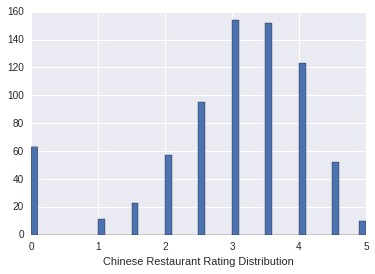

In [18]:
#Define figure to plot histogram  with defined bins 
fig = plt.figure()
chiRatings.hist(bins=50, range=(0,5))  #max = 5, bin size = 0.1, bins = 5 / 0.1 = 50
plt.xlabel('Chinese Restaurant Rating Distribution')
fig.savefig('histRatingChinese.pdf')

In [19]:
#Descriptive Statistics - Mexican Restaurant Ratings
mexRatings.describe()  

count    740.000000
mean       2.928378
std        1.196354
min        0.000000
25%        2.500000
50%        3.000000
75%        3.625000
max        5.000000
Name: Mexican Restaurant Rating Distribution, dtype: float64

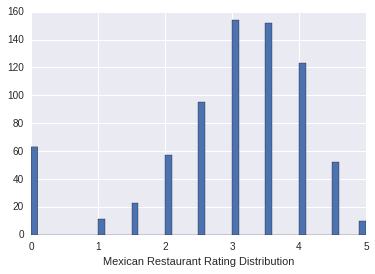

In [20]:
#Define figure to plot histogram  with defined bins 
fig = plt.figure()
mexRatings.hist(bins=50, range=(0,5)) #max = 5, bin size = 0.1, bins = 5 / 0.1 = 50
plt.xlabel('Mexican Restaurant Rating Distribution')
fig.savefig('histRatingMexican.pdf')

# PART - 3

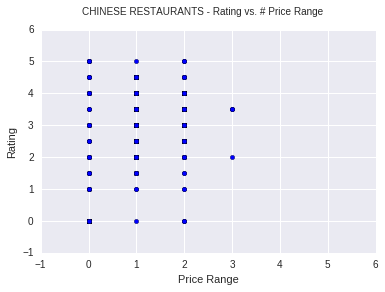

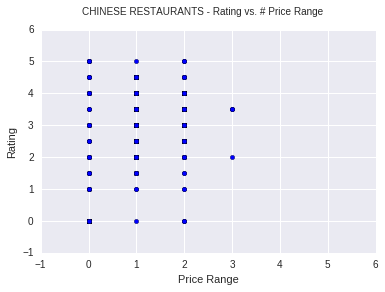

In [23]:
#Plot (Scatter) Chinese restaurant vs. Price range
import matplotlib.pyplot as plt
plt.scatter(chiData[' Price range'], chiData[' Rating'])
plt.suptitle('CHINESE RESTAURANTS - Rating vs. # Price Range')
plt.grid(True)
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.xlim((-1,6))
plt.ylim((-1,6))
plt.show()

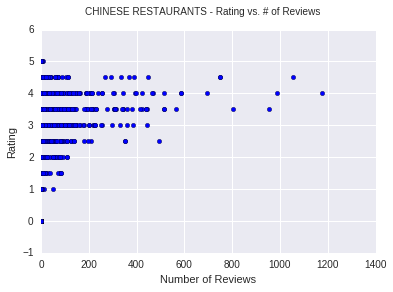

In [24]:
#Plot (Scatter) Chinese restaurant vs. Number of Reviews
plt.scatter(chiData['Number of reviews'], chiData[' Rating'])
plt.suptitle('CHINESE RESTAURANTS - Rating vs. # of Reviews')
plt.grid(True)
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.xlim((-1,1400))
plt.ylim((-1,6))
plt.show()

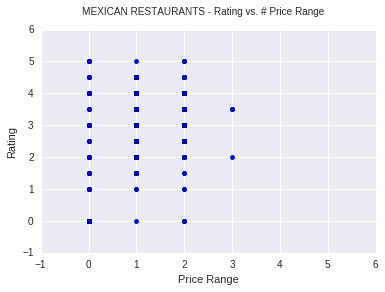

In [25]:
#Plot (Scatter) Mexican restaurant vs. Price range
plt.scatter(mexData[' Price range'], mexData[' Rating'])
plt.suptitle('MEXICAN RESTAURANTS - Rating vs. # Price Range')
plt.grid(True)
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.xlim((-1,6))
plt.ylim((-1,6))
plt.show()

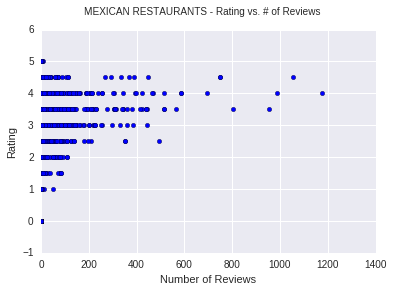

In [26]:
#Plot (Scatter) Mexican restaurant vs. Price range
plt.scatter(mexData['Number of reviews'], mexData[' Rating'])
plt.suptitle('MEXICAN RESTAURANTS - Rating vs. # of Reviews')
plt.grid(True)
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.xlim((-1,1400))
plt.ylim((-1,6))
plt.show()

In [ ]:
PART4

In [29]:
def regress(myData):
    """
    linear regress data
    return intercept, slopes and r^2 value
    """
    from sklearn import linear_model
    from pandas import DataFrame
    #x = DataFrame(data = myData, columns = ['2', '3'])
    x = myData[:,[1,2]]
    #xarr = x.as_matrix()
    #print(x)
    X = np.array([np.concatenate((v,[1])) for v in x])
    #print(X)
    model = linear_model.LinearRegression(fit_intercept = True)
    #y = DataFrame(data = myData, columns = ['1'])
    y = myData[:,0]
    #yarr = y.as_matrix()
    #print(y)
    fit = model.fit(X,y)
    fit.intercept_
    fit.coef_
    #print("Intercept : ",fit.intercept_)
    #print("Slope : ", fit.coef_)

    from sklearn.metrics import r2_score
    pred = model.predict(X)
    r2 = r2_score(y,pred)
    #print ('R-squared: %.4f' % (r2))

    return [fit.intercept_, fit.coef_[0], fit.coef_[1], r2];

In [30]:
def myPlot(myData, b):
    """
    plot actual data and
    model plane
    """
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib import cm
    fig = plt.figure()
    ax = fig.gca(projection='3d')               # to work in 3d
    plt.hold(True)
    
    x_max = max(myData[:,1])
    y_max = max(myData[:,2])
    
    b0 = float(b[0])
    b1 = float(b[1])
    b2 = float(b[2])
    
    x_surf=np.linspace(0, x_max, 100)                # generate a mesh
    y_surf=np.linspace(0, y_max, 100)
    x_surf, y_surf = np.meshgrid(x_surf, y_surf)
    z_surf = b0 + b1*x_surf +b2*y_surf         # ex. function, which depends on x and y
    ax.plot_surface(x_surf, y_surf, z_surf, cmap=cm.hot, alpha=0.2);    # plot a 3d surface plot
    
    x=myData[:,1]
    y=myData[:,2]
    z=myData[:,0]
    ax.scatter(x, y, z);                        # plot a 3d scatter plot
    
    ax.set_xlabel('x1')
    ax.set_ylabel('y2')
    ax.set_zlabel('y')
    
    plt.show()

In [31]:
import pandas as pd
import numpy as np
import glob
from pandas import DataFrame
from mpl_toolkits.mplot3d import *

In [32]:
a = pd.read_csv('file:///home/yataolu/Downloads/programming/mexican.csv')
b = pd.read_csv('file:///home/yataolu/Downloads/programming/mexican.csv')
df1 = pd.concat([a,b], axis = 0)
df1 = df1.reset_index()

In [33]:
myData = DataFrame(data = df1, columns = [ ' Rating', 'Number of reviews',' Price range', ], dtype = None)
myData = myData.as_matrix()
[b0, b1, b2, r2] = regress(myData)

In [ ]:
b = [b0, b1, b2]
myPlot(myData, b)